In [2]:
#Load imp lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Stats Libs
from arch import arch_model
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
#load data for TATA Steel
df = pd.read_csv('D:/NLP Course/IT Sector/NIFTY IT 1 Yr Data.csv')

In [6]:
#Convert it to datetime from object
df['Date']= pd.to_datetime(df.Date)
df.head(1)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2020-01-20,16389.6,16465.05,16162.5,16207.15,27054398,2598.01


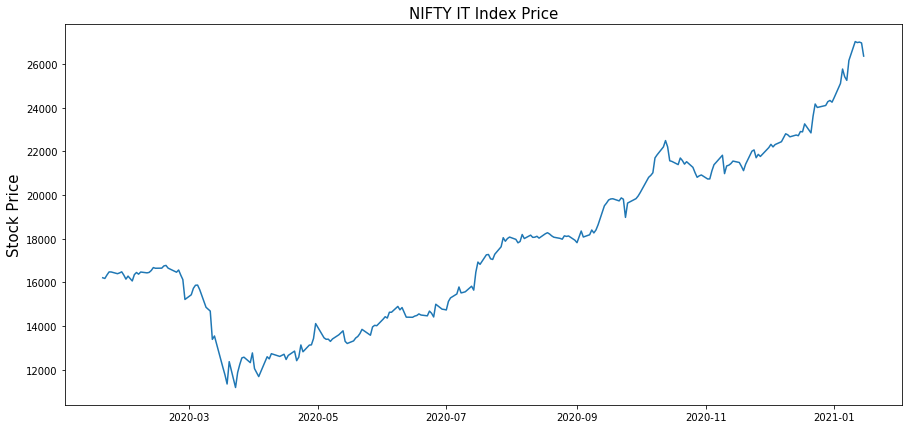

In [29]:
plt.figure(figsize=(15,7))
plt.plot(df['Date'],df['Close'])
plt.ylabel('Stock Price', fontsize=15)
plt.title('NIFTY IT Index Price', fontsize=15)
plt.show()

In [18]:
#lets set the index to 40th row from where upward trend has started
data = df.iloc[40:,]

In [19]:
import statsmodels.api as sm
from statsmodels import regression

prices = data.copy()

close_price = prices['Close']
dates = close_price.index             #index the number of records 0,1,.......250 

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X)         

model = regression.linear_model.OLS(close_price, x).fit()

# Get coefficients of line
c = model.params[0]            
m = model.params[1]

prices['Y_OLS'] = m*X + c

print(m,c)

65.61121534987838 11208.36466260438


C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


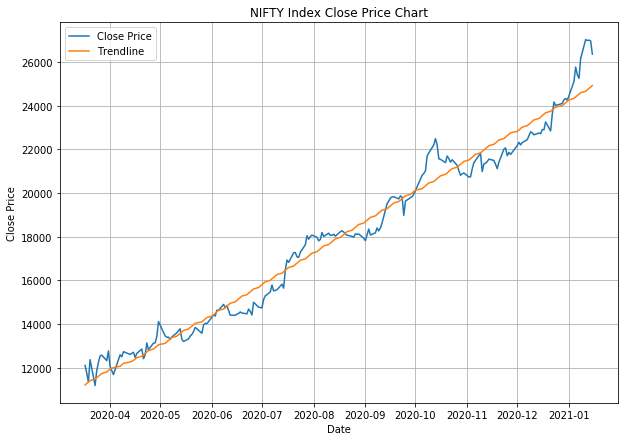

In [40]:
fig, ax = plt.subplots()

ax.plot(prices['Date'],prices['Close'],label = 'Close Price' )
ax.plot(prices['Date'],prices['Y_OLS'],label = 'Trendline')         

ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('NIFTY Index Close Price Chart')

fig.set_size_inches(10,7)
plt.grid()                #put grid in background
ax.legend()               #shows the legends
plt.show()

In [21]:
# Simple Moving Average 
SMA10 = pd.DataFrame()
SMA10['Close'] = data['Close'].rolling(window=10).mean() 

# Simple Moving Average 
SMA30 = pd.DataFrame()
SMA30['Close'] = data['Close'].rolling(window=30).mean() 

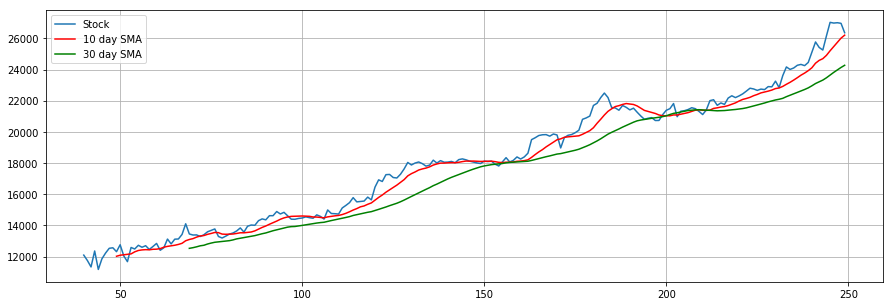

In [22]:
# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(15,5))
plt.plot(data['Close'], label='Stock')
plt.plot(SMA10['Close'],'r', label='10 day SMA')
plt.plot(SMA30['Close'],'g', label='30 day SMA')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

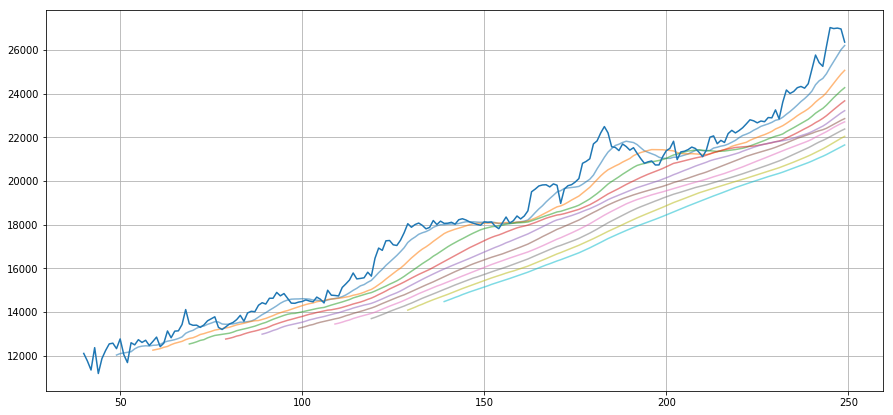

In [23]:
#lets create a list of rolling means for days 10,20,30...100
rolling_means = {}

for i in np.linspace(10, 100, 10):
    X = data['Close'].rolling(window=int(i),center=False).mean()
    rolling_means[i] = X
    X.plot(figsize=(15,7), alpha = 0.55)
    
rolling_means = pd.DataFrame(rolling_means).dropna()

rolling_means.head()

plt.plot(data['Close'])
plt.grid(True)
plt.show()

C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


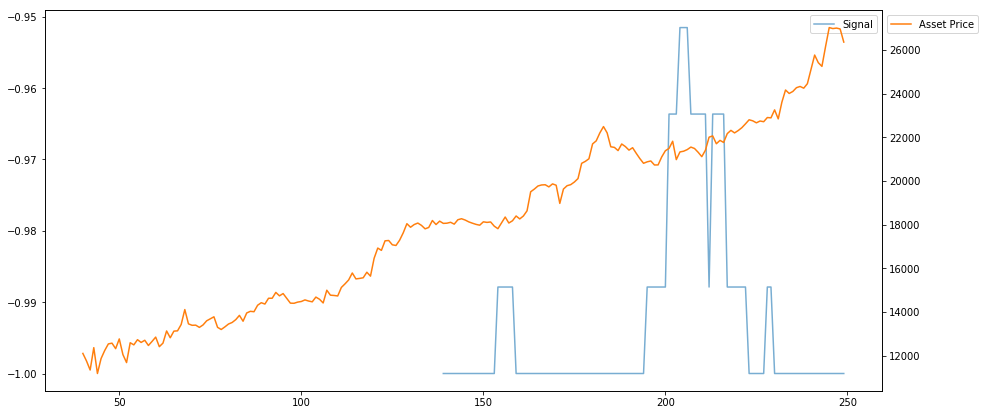

In [24]:
import scipy.stats as stats
import scipy.spatial.distance as distance

asset = data['Close']

scores = pd.Series(index=asset.index)
for date in rolling_means.index:
    mavg_values = rolling_means.loc[date]
    ranking = stats.rankdata(mavg_values.values)
    d, _ = stats.spearmanr(ranking, range(1, 11))
    scores[date] = d

# Normalize the  score
(scores).plot(figsize=(15,7), alpha=0.6);
plt.legend(['Signal'], bbox_to_anchor=(1, 0.9))
asset.plot(secondary_y=True, alpha=1)
plt.legend(['Asset Price'], bbox_to_anchor=(1, 1))
plt.show()

C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


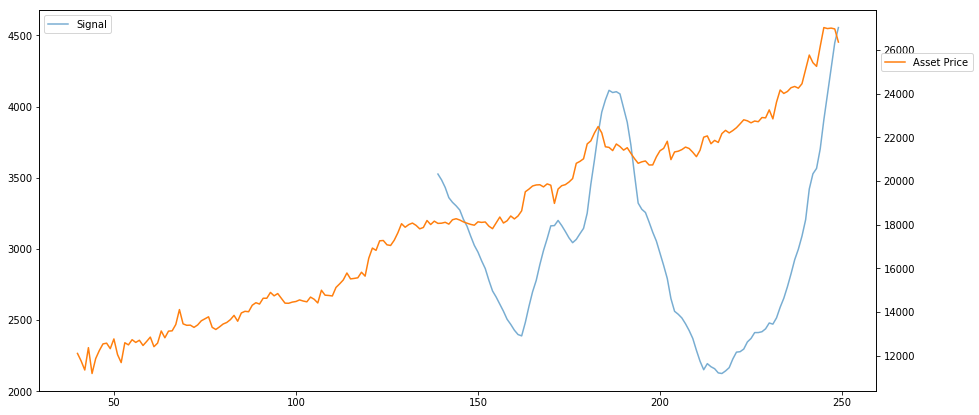

In [45]:
scores = pd.Series(index=asset.index)
for date in rolling_means.index:
    mavg_values = rolling_means.loc[date]
    d = np.max(mavg_values) - np.min(mavg_values)
    scores[date] = d
    #print(d)
    
# Normalize the  score
(scores).plot(figsize=(15,7), alpha=0.6);
plt.legend(['Signal'], bbox_to_anchor=(1, 0.9))
asset.plot(secondary_y=True, alpha=1)
plt.legend(['Asset Price'], bbox_to_anchor=(1, 0.9))
plt.show()

In [26]:
n= 20

# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data['Close'].rolling(window=n).mean()
    SD = data['Close'].rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

In [27]:
# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
STOCK_BBANDS = BBANDS(data, n)
#print(STOCK_BBANDS)

# Create the plot
Data = pd.concat([STOCK_BBANDS['Close'],STOCK_BBANDS.UpperBB,STOCK_BBANDS.LowerBB],axis=1)
#Data.plot(figsize=(9,5),grid=True)

C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


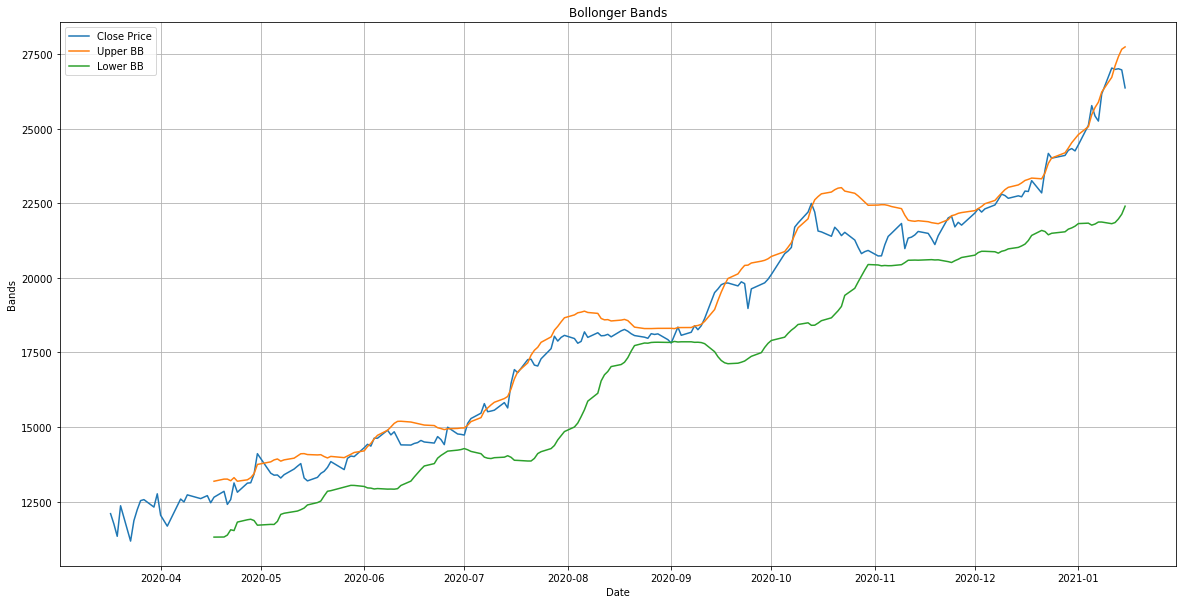

In [30]:
fig, ax = plt.subplots()

ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['Close'],label = 'Close Price' )
ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['UpperBB'],label = 'Upper BB' )
ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['LowerBB'],label = 'Lower BB' )

ax.set_xlabel('Date')
ax.set_ylabel('Bands')
ax.set_title('Bollonger Bands')

fig.set_size_inches(20,10)
plt.grid() #put grid in background
ax.legend()    #shows the legends
plt.show()

In [32]:
#RSI Indicator

# store diff between two consecutive prices in time domain 
delta = data['Close'].diff(1)

up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

t= 14 

Avg_Gain = up.rolling(window =t).mean()
Avg_Loss = abs(down.rolling(window =t).mean())

RS = Avg_Gain/Avg_Loss

RSI = 100.0 - ( 100.0/(1.0+RS) )

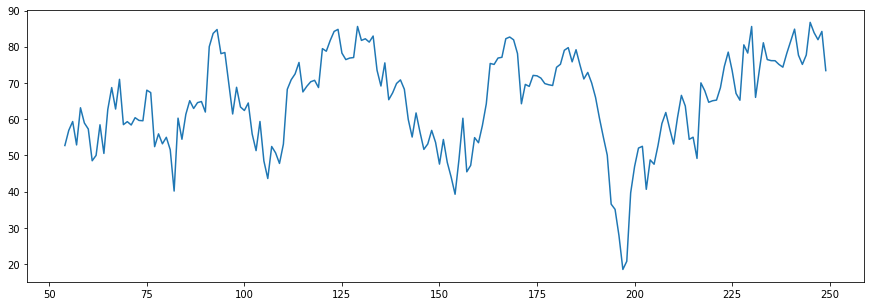

In [33]:
plt.figure(figsize=(15,5))
RSI.plot()

In [36]:
new_df = pd.DataFrame()

new_df['Close'] = data['Close']
new_df['RSI']   = RSI

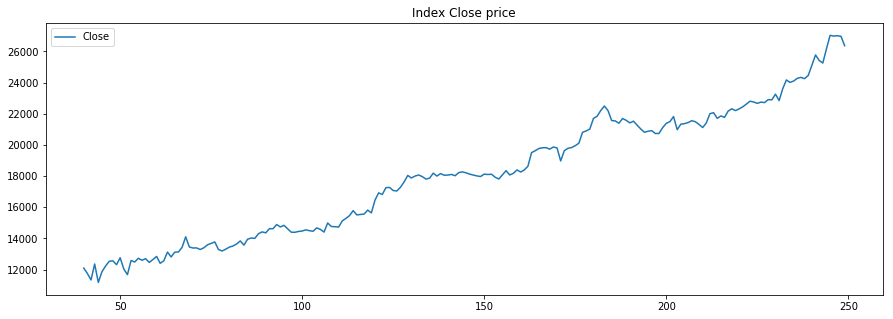

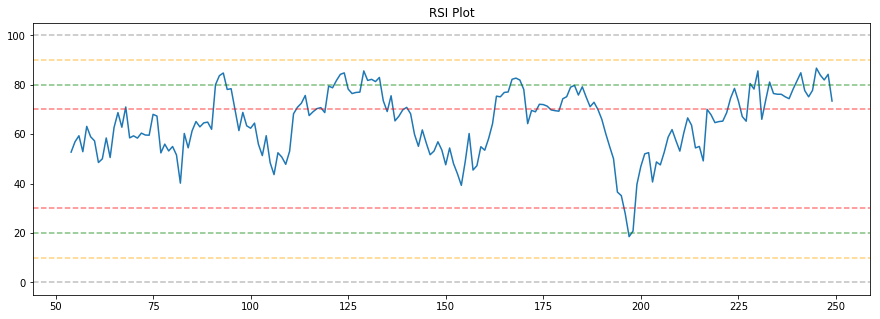

In [39]:
plt.figure(figsize=(15,5))
plt.plot(new_df.index,new_df['Close'])
plt.title('Index Close price')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

plt.figure(figsize=(15,5))
plt.title('RSI Plot')
plt.plot(new_df.index,new_df['RSI'])
plt.axhline(0,linestyle='--',alpha=0.5,color='grey')
plt.axhline(10,linestyle='--',alpha=0.5,color='orange')
plt.axhline(20,linestyle='--',alpha=0.5,color='green')
plt.axhline(30,linestyle='--',alpha=0.5,color='red')
plt.axhline(70,linestyle='--',alpha=0.5,color='red')
plt.axhline(80,linestyle='--',alpha=0.5,color='green')
plt.axhline(90,linestyle='--',alpha=0.5,color='orange')
plt.axhline(100,linestyle='--',alpha=0.5,color='grey')
plt.show()